* Nama : Mukhammad Fahlevi Ali Rafsanjani
* Asal : Bandung
* Kelas: Studi Independen Machine Learning dan Front Ed Web



In [24]:
from google.colab import drive

# u/ dataframe
import pandas as pd
import re


# u/ split data
from sklearn.model_selection import train_test_split

# u/ preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# u/ visualisasi plot
import matplotlib.pyplot as plt

In [25]:
pip install -q kaggle

In [26]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahlevi20","key":"938af4f0ea42e7b7b13a7c8c480b059f"}'}

In [27]:

# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [28]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-09 20:40:01          12019  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7320  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2923  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2870  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [29]:
!kaggle datasets download -d lokkagle/movie-genre-data

  0% 0.00/9.46M [00:00<?, ?B/s]
100% 9.46M/9.46M [00:00<00:00, 86.4MB/s]


In [30]:
# unzip
!mkdir movie-genre-data
!unzip movie-genre-data.zip -d movie-genre-data
!ls movie-genre-data

mkdir: cannot create directory ‘movie-genre-data’: File exists
Archive:  movie-genre-data.zip
  inflating: movie-genre-data/kaggle_movie_train.csv  
kaggle_movie_train.csv


In [74]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv('movie-genre-data/kaggle_movie_train.csv')
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [76]:
long_string= '============================================================================================='
def printByInformation(dataset,option=False):
  if option:
    pd.set_option('display.max_columns',None)
  print(f'Current Cols:{dataset.shape[1]}')
  print(f'Current Rows:{dataset.shape[0]}')
  print(long_string)
  print(f'Amount of NaNs: {dataset.isna().sum().sum()} the number of NaNs Found')
  print(long_string)
  print(f'Columns which has value NaN: {dataset.isna().sum()}')
  print(long_string)
  print(f'Column Name:{list(dataset.columns)}')
  print(long_string)
  print(f'{dataset.info()}')
  print(f'{dataset.describe()}')
printByInformation(df,True)

Current Cols:3
Current Rows:22579
Amount of NaNs: 0 the number of NaNs Found
Columns which has value NaN: id       0
text     0
genre    0
dtype: int64
Column Name:['id', 'text', 'genre']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB
None
                 id
count  22579.000000
mean   14134.852651
std     8132.614667
min        0.000000
25%     7096.500000
50%    14168.000000
75%    21159.000000
max    28166.000000


In [77]:
df.head(50)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [78]:
import re

In [79]:
df.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [80]:
df = df[~df['genre'].isin(['sci-fi','horror','other','adventure','romance'])]
df['genre'].value_counts()

drama       8873
thriller    6824
comedy      2941
action      2392
Name: genre, dtype: int64

In [81]:
# Menghapus special character di kolom text menggunakan re
df['Text'] = df['text'].map(lambda x: re.sub(r'\W+', ' ', x))
# drop kolom id dan text lama
df = df.drop(['id', 'text'], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,genre,Text
0,thriller,eady dead maybe even wishing he was INT 2ND FL...
1,comedy,t summa cum laude and all And I m about to lau...
2,drama,up Come I have a surprise She takes him by th...
3,thriller,ded by the two detectives INT JEFF S APARTMENT...
4,drama,nd dismounts just as the other children reach ...


In [82]:
#mengunbah teks menjadi dummy agar dapat di training
genre = pd.get_dummies(df.genre)
df_genre = pd.concat([df, genre], axis=1)
df_genre = df_genre.drop(columns='genre')
df_genre.head()

,Text,action,comedy,drama,thriller
0,eady dead maybe even wishing he was INT 2ND FL...,0,0,0,1
1,t summa cum laude and all And I m about to lau...,0,1,0,0
2,up Come I have a surprise She takes him by th...,0,0,1,0
3,ded by the two detectives INT JEFF S APARTMENT...,0,0,0,1
4,nd dismounts just as the other children reach ...,0,0,1,0


In [83]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21030 entries, 0 to 22578
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      21030 non-null  object
 1   action    21030 non-null  uint8 
 2   comedy    21030 non-null  uint8 
 3   drama     21030 non-null  uint8 
 4   thriller  21030 non-null  uint8 
dtypes: object(1), uint8(4)
memory usage: 410.7+ KB


In [84]:
text = df_genre['Text'].astype(str)
label = df_genre[['action', 'comedy','drama','thriller']].values

In [85]:
text

0        eady dead maybe even wishing he was INT 2ND FL...
1        t summa cum laude and all And I m about to lau...
2         up Come I have a surprise She takes him by th...
3        ded by the two detectives INT JEFF S APARTMENT...
4        nd dismounts just as the other children reach ...
                               ...                        
22574    n in the world to decide what I m going to do ...
22575    shards BOJO LAZ Laz pushes Deke back through t...
22576    OTTIE You ve got a thing about Ernie s haven t...
22577     with marked skill and dexterity LANA wryly Yo...
22578    rd walks off down the hallway leaving his post...
Name: Text, Length: 21030, dtype: object

In [86]:
label

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
genre_train, genre_test, label_train, label_test = train_test_split(text, label, test_size = 0.2)

In [90]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(genre_train) 
tokenizer.fit_on_texts(genre_test)
 
sekuens_train = tokenizer.texts_to_sequences(genre_train)
sekuens_test = tokenizer.texts_to_sequences(genre_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [91]:

model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 109,572
Trainable params: 109,572
Non-trainable params: 0
_________________________________________________________________


In [93]:
Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [94]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi  di atas 97%, Training dihentikan!")
      self.model.stop_training = True

callbacks = myCallback()

In [95]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=1,callbacks=[callbacks])

Epoch 1/30
526/526 [==============================] - 80s 149ms/step - loss: 1.1567 - accuracy: 0.4439 - val_loss: 0.9591 - val_accuracy: 0.5010
Epoch 2/30
526/526 [==============================] - 78s 149ms/step - loss: 0.8998 - accuracy: 0.5131 - val_loss: 0.9311 - val_accuracy: 0.5109
Epoch 3/30
526/526 [==============================] - 78s 147ms/step - loss: 0.8252 - accuracy: 0.5357 - val_loss: 0.8922 - val_accuracy: 0.5157
Epoch 4/30
526/526 [==============================] - 79s 149ms/step - loss: 0.7728 - accuracy: 0.5835 - val_loss: 0.7522 - val_accuracy: 0.6783
Epoch 5/30
526/526 [==============================] - 78s 149ms/step - loss: 0.7024 - accuracy: 0.6431 - val_loss: 0.6905 - val_accuracy: 0.7166
Epoch 6/30
526/526 [==============================] - 79s 151ms/step - loss: 0.7049 - accuracy: 0.6621 - val_loss: 0.6914 - val_accuracy: 0.7123
Epoch 7/30
526/526 [==============================] - 78s 148ms/step - loss: 0.4567 - accuracy: 0.8294 - val_loss: 0.6665 - val_ac

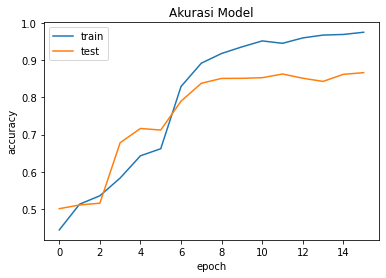

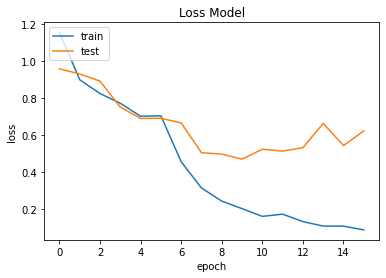

In [96]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()